In [1]:
pip install mysql-connector-python

   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
    --------------------------------------- 0.3/16.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.1 MB 847.7 kB/s eta 0:00:19
   - -------------------------------------- 0.5/16.1 MB 847.7 kB/s eta 0:00:19
   - -------------------------------------- 0.5/16.1 MB 847.7 kB/s eta 0:00:19
   - -------------------------------------- 0.8/16.1 MB 499.3 kB/s eta 0:00:31
   - -------------------------------------- 0.8/16.1 MB 499.3 kB/s eta 0:00:31
   - -------------------------------------- 0.8/16.1 MB 499.3 kB/s eta 0:00:31
   - -------------------------------------- 0.8/16.1 MB 499.3 kB/s eta 0:00:31
   - -------------------------------------- 0.8/16.1 MB 499.3 kB/s eta 0:00:31
   -- ------------------------------------- 1.0/16.1 MB 386.9 kB/s eta 0:00:39
   -- ------------------------------------- 1.0/16.1 MB 386.9 kB/s eta 0:00:39



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

# Load the original CSV
df = pd.read_csv("data.csv", encoding='ISO-8859-1')

# Convert InvoiceDate to MySQL DATETIME format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df = df.dropna(subset=['InvoiceDate'])
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Clean CustomerID: convert to nullable integer (removes .0)
df['CustomerID'] = pd.to_numeric(df['CustomerID'], errors='coerce').dropna().astype('Int64')

# Save the cleaned file
df.to_csv("final_cleaned_data.csv", index=False)


In [2]:
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [4]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("data.csv", encoding='ISO-8859-1')

# View basic info
print(" Dataset shape:", df.shape)
print("\n Columns:\n", df.columns)
print("\n First 5 rows:")
print(df.head())


 Dataset shape: (541909, 8)

 Columns:
 Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

 First 5 rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [5]:
# Convert InvoiceDate to datetime format and then to MySQL DATETIME format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df = df.dropna(subset=['InvoiceDate'])  # Drop rows with invalid dates
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Convert CustomerID to integer (if any are missing or not numeric, handle them)
df['CustomerID'] = pd.to_numeric(df['CustomerID'], errors='coerce').astype('Int64')

# Optional: Drop rows with missing CustomerID or Description if needed
df = df.dropna(subset=['CustomerID', 'Description'])

# Remove negative or zero quantities (optional: might be returns)
df = df[df['Quantity'] > 0]

# Check the result
print(" Cleaned data shape:", df.shape)
df.head()


 Cleaned data shape: (397924, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [7]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 2.2 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/8.1 MB 2.3 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.1 MB 2.4 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 2.5 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 2.6 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.1 MB 2.8 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 2.8 MB/s eta 0:00:02
   ------------------------ --------------- 5.0/8.1 MB 2.9 MB/s eta 0:00:02
   --------------------------- ------------ 5.5/8.1 MB 2.9 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.1 MB 3.0 MB/s eta 0:00:01
   -----------------------------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


 Unique Customers: 4339
 Unique Products: 3877
 Countries: 37
 Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


C:\Users\kiran\AppData\Local\Temp\ipykernel_15400\896069949.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


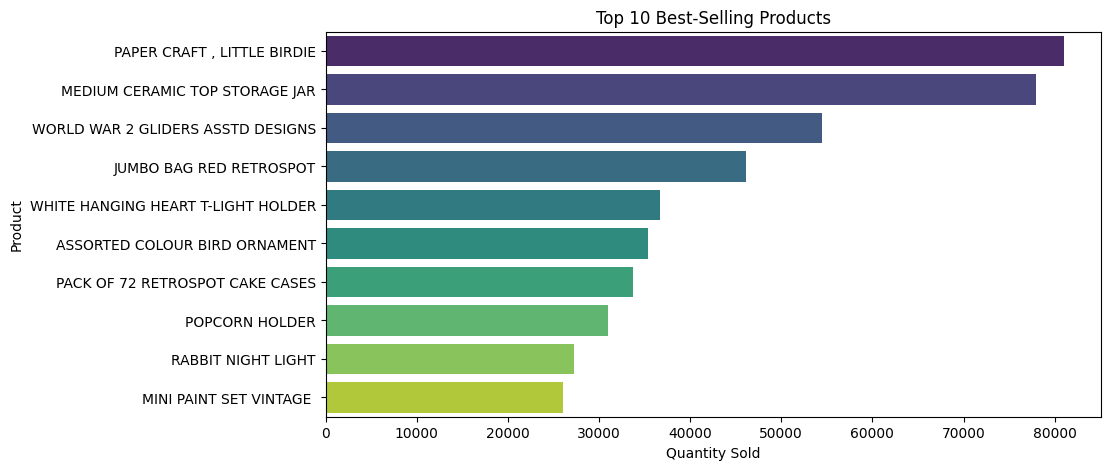

C:\Users\kiran\AppData\Local\Temp\ipykernel_15400\896069949.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_country.values, y=revenue_by_country.index, palette='magma')


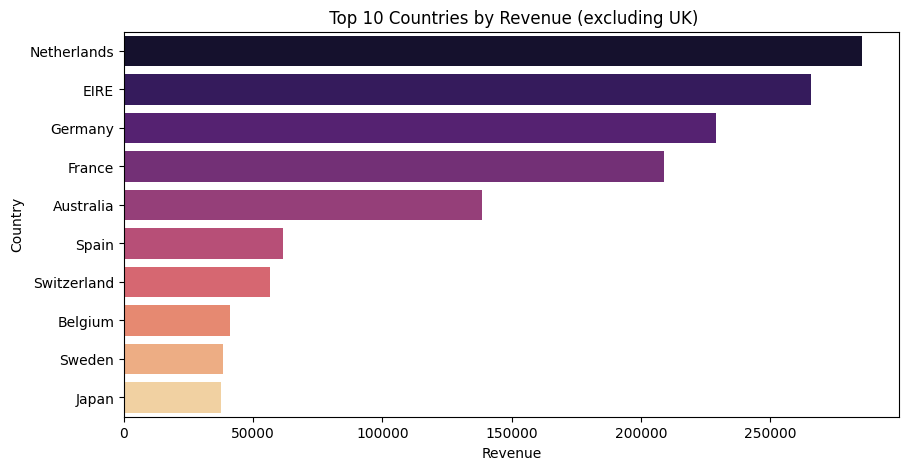

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic EDA stats
print(" Unique Customers:", df['CustomerID'].nunique())
print(" Unique Products:", df['Description'].nunique())
print(" Countries:", df['Country'].nunique())
print(" Date Range:", df['InvoiceDate'].min(), "to", df['InvoiceDate'].max())

# Add a Revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Top 10 best-selling products by quantity
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product")
plt.show()

# Revenue by country (excluding UK for visibility)
revenue_by_country = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
revenue_by_country = revenue_by_country[revenue_by_country.index != 'United Kingdom'].head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=revenue_by_country.values, y=revenue_by_country.index, palette='magma')
plt.title(" Top 10 Countries by Revenue (excluding UK)")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.show()


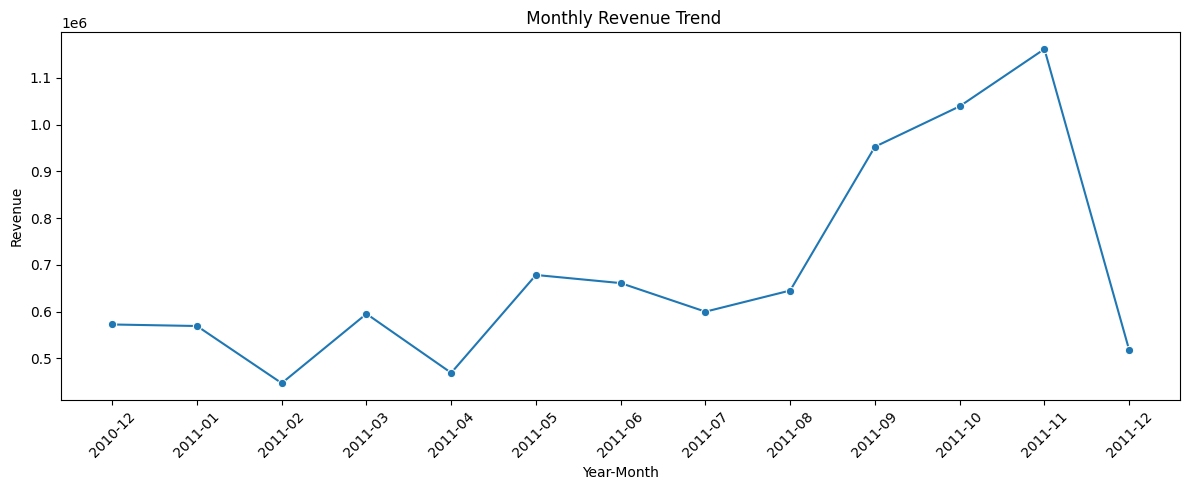

C:\Users\kiran\AppData\Local\Temp\ipykernel_15400\3054016154.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='coolwarm')


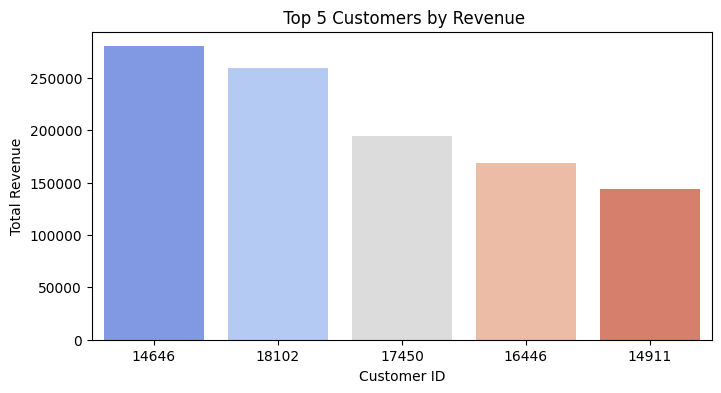

In [11]:
# Convert InvoiceDate back to datetime if needed
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create Year-Month column
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M').astype(str)

# Monthly revenue trend
monthly_revenue = df.groupby('YearMonth')['Revenue'].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_revenue, x='YearMonth', y='Revenue', marker='o')
plt.title(" Monthly Revenue Trend")
plt.xlabel("Year-Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 5 customers by revenue
top_customers = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,4))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='coolwarm')
plt.title(" Top 5 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue")
plt.show()


In [12]:
# 1. Total revenue by each product
product_revenue = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
print(" Top 10 Products by Revenue:\n", product_revenue)

#  2. Monthly number of orders
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_orders = df.groupby('InvoiceMonth')['InvoiceNo'].nunique().reset_index()
monthly_orders.columns = ['Month', 'NumOrders']
print("\n Monthly Orders:\n", monthly_orders.tail())

#  3. Top countries by number of invoices
top_countries = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)
print("\n Top Countries by Number of Invoices:\n", top_countries)

#  4. Most returned products (negative quantity)
returned = df[df['Quantity'] < 0]
most_returned = returned.groupby('Description')['Quantity'].sum().sort_values().head(5)
print("\n Most Returned Products:\n", most_returned)


 Top 10 Products by Revenue:
 Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: Revenue, dtype: float64

 Monthly Orders:
       Month  NumOrders
8   2011-08       1281
9   2011-09       1756
10  2011-10       1929
11  2011-11       2658
12  2011-12        778

 Top Countries by Number of Invoices:
 Country
United Kingdom    16649
Germany             457
France              389
EIRE                260
Belgium              98
Netherlands          95
Spain                90
Portugal             57
Australia            57
Switzerland          51
Nam